## Outlier Detection

There are two types of outliers :

1. Univariate :
   Outliers for distribution of values in a single feature space.
2. Multivariate : 
   Outliers for distribution of values in n-dimension feature space.

Different dimensions of Outliers :
1. Point outliers      :  Values that lay far from the data trend.
2. Contextual outliers : Values that are noise for Language and text based tasks (punctuation and surrounding noise)
3. Collective outliers : Outliers that are a new behaviour/phenomena observed in a dataset (for e.g. in signals)

#### NOTE : Outliers that are not errors but are unique behaviour is called novelties

#### Methods for outlier detection are:
1. Z-Score or Extreme Value Analysis (parametric)
2. Probabilistic and Statistical Modeling (parametric)
3. Linear Regression Models 
    1. PCA
    2. LMS
4. Proximity Based Models (non-parametric)
5. Information Theory Models
6. High Dimensional Outlier Detection Methods (high dimensional sparse data)

## 1. Z-Score

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is   from the sample’s mean, assuming a gaussian distribution.

#### NOTE : Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value. If a distribution is normal, then the values of the mean, median, and mode are the same.

For making data Gaussian distributed the feature should be scaled applying transformations to data.

For each data point :  
z score  = (x - mean)/standard_deviation

When computing the z-score for each sample on the data set a threshold must be specified.
    That threshold can be N times standard deviation.
    Any values falling beyond this is a outlier

In [4]:
from sklearn.datasets import california_housing

In [7]:
data = california_housing.fetch_california_housing()

In [9]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
data.data.shape

(20640, 8)

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(data.data)

In [21]:
df.columns = data.feature_names

In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [29]:
df['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [73]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [31]:
scale = StandardScaler()

In [34]:
scale.fit(df['AveRooms'].values.reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scale.mean_

array([5.42899974])

In [74]:
np.std(df['AveRooms'].values)

2.474113202333516

In [38]:
scaled_data = scale.transform(df['AveRooms'].values.reshape(-1, 1))

In [67]:
scaled_data.mean()

6.609699867535816e-17

In [68]:
import seaborn as sns

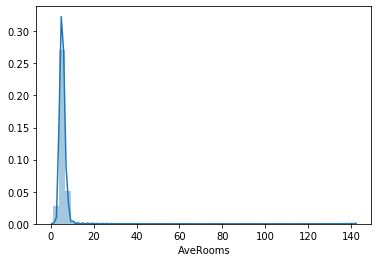

In [69]:
sns.distplot(df['AveRooms'])

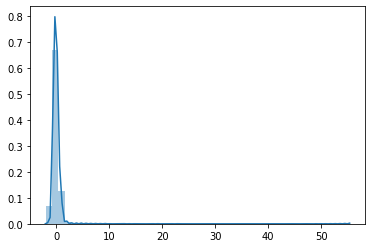

In [70]:
sns.distplot(scaled_data)

In [71]:
pd.DataFrame(scaled_data).describe()

,0
count,2.064000e+04
mean,2.704111e-16
std,1.000024e+00
min,-1.852319e+00
25%,-3.994496e-01
50%,-8.078489e-02
75%,2.519615e-01
max,5.516324e+01
